# **Project Name**    - COVID-19.

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Aniket Mishra


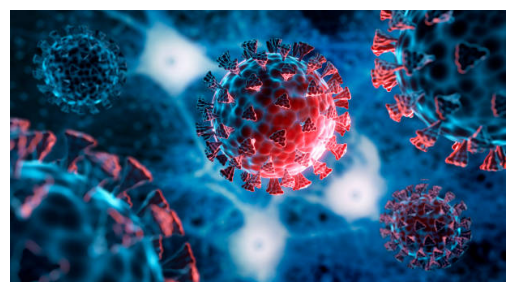

In [190]:
img = mpimg.imread('coronavirus.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# **Project Summary -**

This project analyzes state-wise COVID-19 data in India, providing valuable insights into the spread,   recovery, and mortality associated with the pandemic.   Using a structured dataset,   the project employs various data visualization and analysis techniques to uncover patterns and trends.

## Problem Statement

1.What is the trend of active, discharged, and death cases over time for the top 5 most affected states?  

2.Which state recorded the highest number of COVID-19 deaths, and what factors contributed to it?   
3.How do recovery rates differ between states with high and low active case ratios?  
4.Are there correlations between total cases and discharge rates across all states?   
5.Which regions or states had the most efficient recovery process based on the discharge-to-death ratio?     
6.How do smaller regions like union territories compare to larger states in terms of case management and mortality rates?   
7.Is there a significant difference in COVID-19 impact between urbanized and less urbanized states?   
8.What are the outlier states where active ratios or death rates deviate significantly from national trends?   
9.How do states with high total cases distribute across various ratios like active, recovery, and mortality?   
10How can data visualizations such as heatmaps or geographic plots help identify high-risk areas for effective intervention?   


### Define Your Business Objective?

The primary objective of this COVID-19 analysis project is to understand and visualize the spread, impact, and management of COVID-19 cases across various states and union territories in India. 

This analysis will help identify key insights and trends that can support decision-making, improve response strategies,   and optimize resources for managing the pandemic.



# ***Let's Begin !***

## ***1. Know Your Data***

# Import the libraries and dataset

In [179]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

### Dataset Loading

In [169]:
df = pd.read_csv("pandas/covid-19.csv")


### Dataset First View

In [171]:
df.head(10)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376
5,Chandigarh,100693,0,99508,1185,0.0,98.82,1.18,30501026
6,Chhattisgarh,1187695,0,1173505,14190,0.0,98.81,1.19,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578
8,Delhi,2040910,14,2014230,26666,0.0,98.69,1.31,773997
9,Goa,263346,3,259329,4014,0.0,98.47,1.52,3772103


### Dataset Rows & Columns count

In [191]:
# Shape of the dataset
df.shape

(36, 9)

##  Understanding Your Variables

In [10]:
# Getting list of all columns present in the dataframe
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

#### Duplicate Values

In [11]:
# Checking for the duplicated value

df.duplicated().sum()

np.int64(0)

### Dataset Information`

In [12]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [13]:
# Statistical measurement of the dataset

df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


### Variables Description

State/UTs:
Represents the name of the State or Union Territory in India where the COVID-19 cases have been reported.

Total Cases:
The total number of confirmed COVID-19 cases recorded in each State/UT.

Active Cases:
The number of currently active COVID-19 cases in each State/UT, which excludes recovered cases and deaths.

Recovered:
The total number of individuals who have recovered from COVID-19 in each State/UT.

Deaths:
The total number of fatalities due to COVID-19 in each State/UT.

Tests Conducted (if applicable):
The total number of COVID-19 tests conducted in each State/UT to monitor and detect the virus.

Recovery Rate (calculated column):
The percentage of total recovered cases out of the total confirmed cases, calculated as:

`

In [63]:
df.drop(['Population'],inplace=True,axis = 1)

During the data preprocessing phase of my project,  
I removed the Population column from the dataset as it was not relevant to the analysis or visualizations being conducted.   
The column did not provide meaningful insights for the objectives of the project and was therefore eliminated to streamline the dataset and focus on the essential variables.

#### Missing Values/Null Values

In [65]:
# Checking for any missing value

df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
dtype: int64


## Which top 10 states/UTs have the highest total COVID-19 cases as shown in the bar plot?

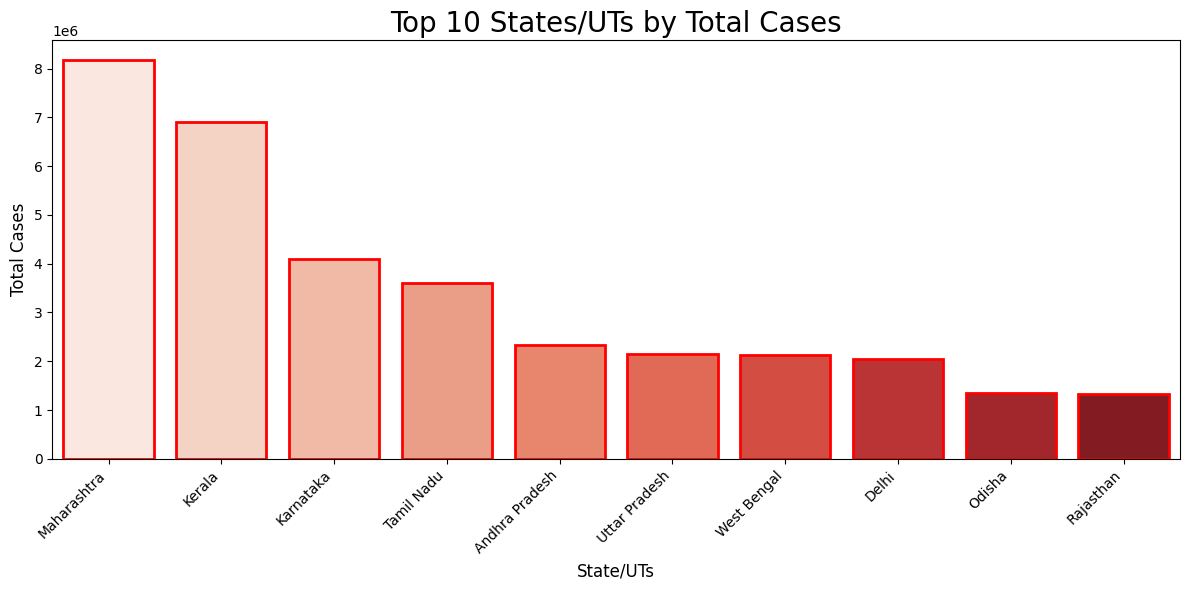

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='State/UTs', y='Total Cases', palette='Reds',linewidth = 2,edgecolor = 'red')
plt.title('Top 10 States/UTs by Total Cases', fontsize=20)
plt.xlabel('State/UTs', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Maharashtra leads significantly in total COVID-19 cases, followed by Kerala and Karnataka, reflecting a heavy burden on these states. Southern states dominate the top 10, highlighting population density and urbanization as key factors. Delhi's high cases emphasize its role as a densely populated hub, while Rajasthan and Odisha appear at the lower end of the list. This analysis underscores the need for resource prioritization in highly impacted regions like Maharashtra, Kerala, and Karnataka to manage and mitigate future outbreaks effectively.

### Which top 10 states/UTs have the highest number of COVID-19 deaths as shown in the bar plot?

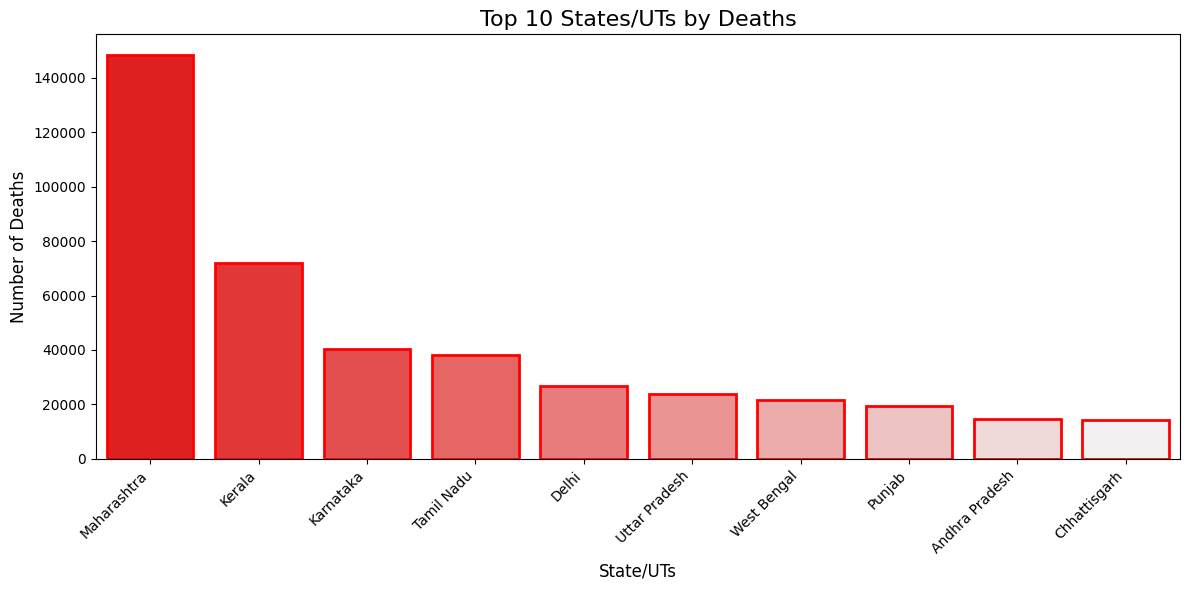

In [84]:
top_10_deaths = df.nlargest(10, 'Deaths')
custom_palette = sns.light_palette("red", n_colors=10, reverse=True)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_10_deaths, x='State/UTs', y='Deaths', palette=custom_palette,linewidth = 2,edgecolor = 'red') 
plt.title('Top 10 States/UTs by Deaths', fontsize=16)
plt.xlabel('State/UTs', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Maharashtra records the highest COVID-19 deaths, significantly outpacing other states, reflecting its high total cases and healthcare challenges. Kerala and Karnataka follow but with a noticeable gap, indicating variations in case severity and healthcare responses. Tamil Nadu, Delhi, and Uttar Pradesh also show considerable death tolls, emphasizing the pandemic's impact on populous and urbanized regions. The chart highlights the need for continued public health interventions and resource allocation to reduce mortality in highly affected states.

### What does the provided code do to visualize the proportion of active cases in the top 5 states/UTs?

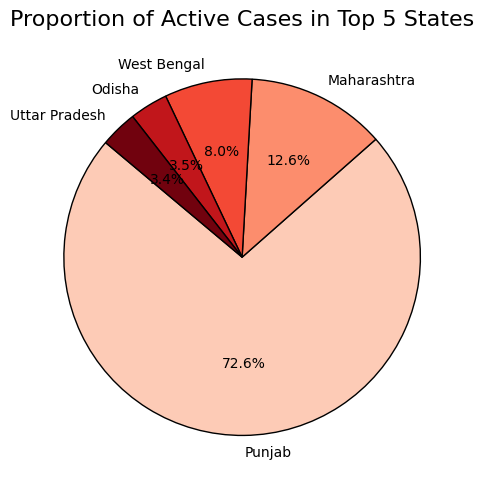

In [175]:
top_5_active_states = df.nlargest(5, 'Active')
plt.figure(figsize=(5, 5))
colors = plt.cm.Reds(range(50, 256, 50))  # Generate shades of red
plt.pie( top_5_active_states['Active'], 
    labels=top_5_active_states['State/UTs'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Active Cases in Top 5 States", fontsize=16)
plt.tight_layout()
plt.show()

The pie chart illustrates the proportion of active cases across the top 5 states. Punjab holds a dominant share with 72.6% of active cases, followed by Maharashtra at 12.6%. West Bengal and Odisha account for 8% and 3.5% respectively, while Uttar Pradesh has the smallest share with 3.4%. This suggests a significant concentration of active cases in Punjab, indicating a potential hotspot or area requiring increased attention and resources to manage the ongoing situation.

### What does the provided code do to visualize the correlation between numerical columns in the dataframe?

In [151]:
corr_df = df.select_dtypes(exclude='object')

<Axes: >

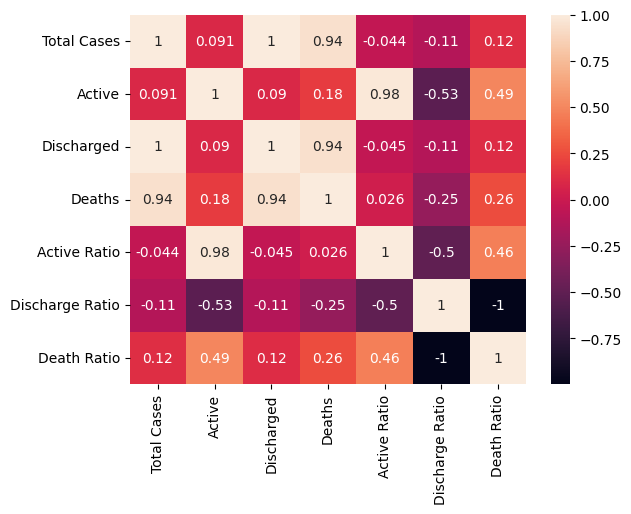

In [155]:
sns.heatmap(corr_df.corr(),annot=True)

The heatmap reveals a strong positive correlation between total cases and active cases, discharges, and deaths. This indicates that as the total number of cases increases, so do the number of active cases, discharges, and deaths. Additionally, a strong negative correlation exists between active cases and discharge ratio, suggesting that as the number of active cases rises, the discharge ratio tends to decrease. Conversely, a positive correlation is observed between active cases and death ratio, implying that an increase in active cases is associated with a higher death ratio. These findings highlight the interconnectedness of various COVID-19 indicators and their potential implications for disease management and resource allocation.

### What does the provided code do to compare the distributions of "Discharged" and "Total Cases" in the dataframe?

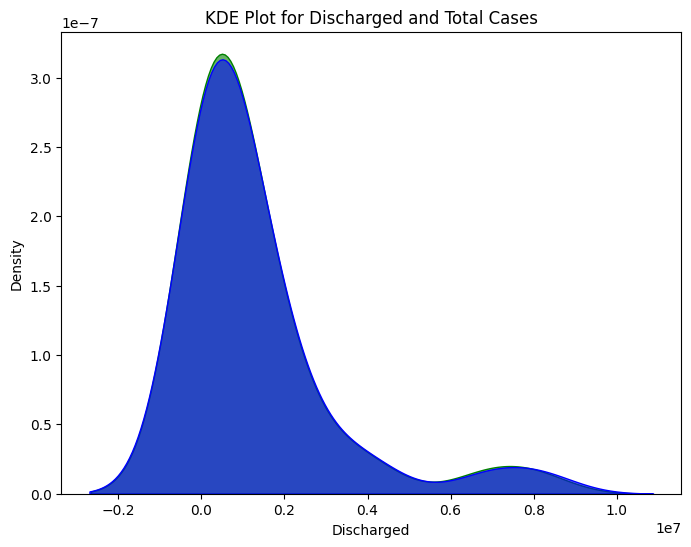

In [159]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Discharged'], shade=True, color='green', alpha=0.6)
sns.kdeplot(df['Total Cases'], shade=True, color='blue', alpha=0.6)
plt.title('KDE Plot for Discharged and Total Cases')
plt.show()

In [ ]:
The code generates a Kernel Density Estimation (KDE) plot to visualize the distribution of two variables.
'Discharged' and 'Total Cases'. The green shaded area represents the distribution of discharged individuals, 
while the blue shaded area shows the distribution of total COVID-19 cases. 
The overlapping areas allow for a comparison of the density and spread of both variables,
helping to identify trends, such as whether the distribution of discharged cases aligns with or differs from the distribution of total cases. 
The plot provides insight into the concentration and variation of these values across the dataset.

### What does the provided code do to visualize the total cases across different states/UTs using a bar plot?

<Axes: xlabel='Total Cases', ylabel='State/UTs'>

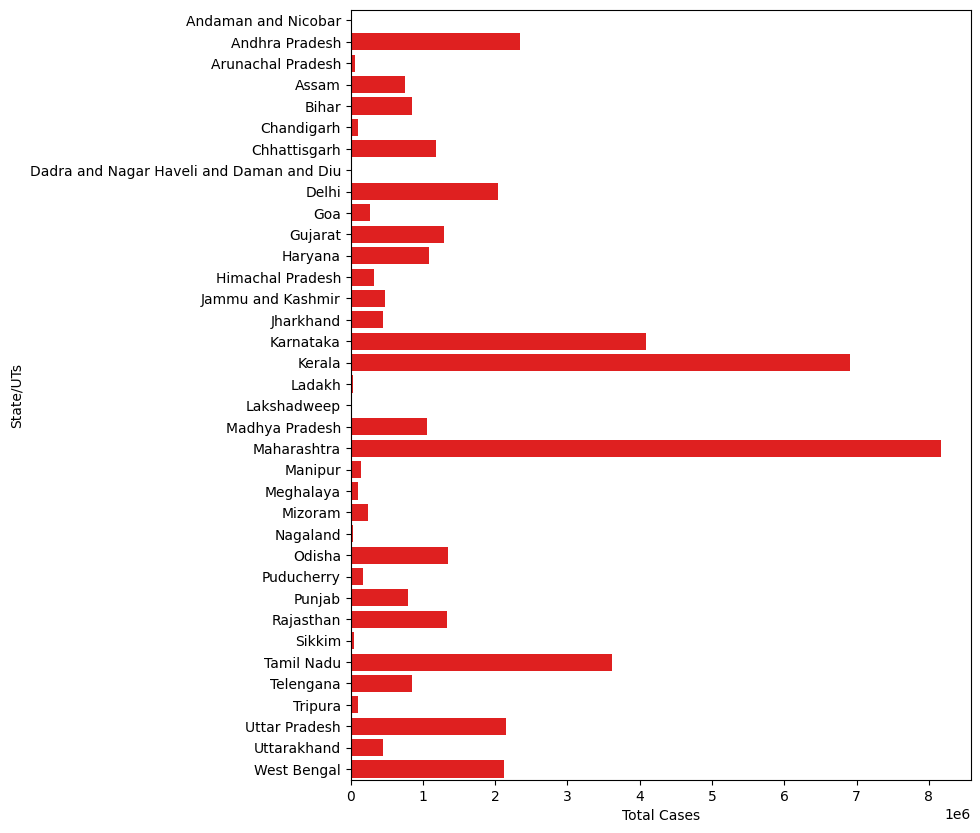

In [118]:
plt.figure(figsize=(8, 10))

sns.barplot(data = df, y="State/UTs", x="Total Cases",color='g','')

## In above plot we can see that Maharastra have maximum number of covid cases

## What does the countplot in the provided code display about the "Active" cases in the dataset?

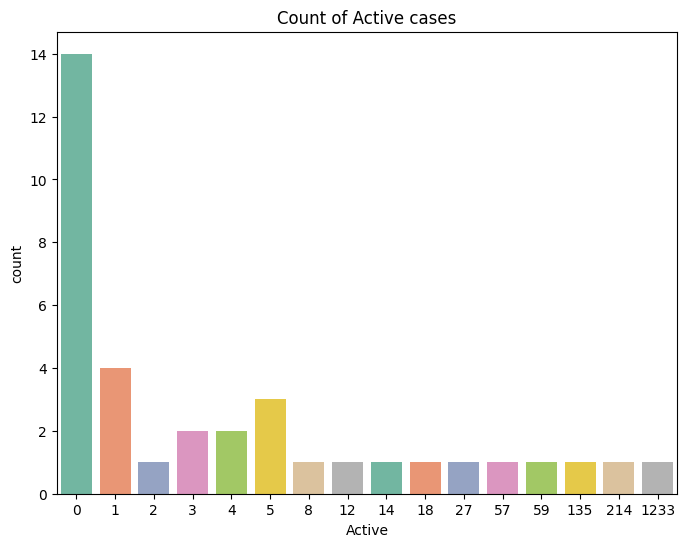

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Active', data=df, palette='Set2')
plt.title('Count of Active cases')
plt.show()

The heatmap reveals a strong positive correlation between total cases and active cases, discharges, and deaths. This indicates that as the total number of cases increases, so do the number of active cases, discharges, and deaths. Additionally, a strong negative correlation exists between active cases and discharge ratio, suggesting that as the number of active cases rises, the discharge ratio tends to decrease. Conversely, a positive correlation is observed between active cases and death ratio, implying that an increase in active cases is associated with a higher death ratio. These findings highlight the interconnectedness of various COVID-19 indicators and their potential implications for disease management and resource allocation.

### What type of plot does the following code generate, and what is its purpose in visualizing the relationships between variables in the dataset?

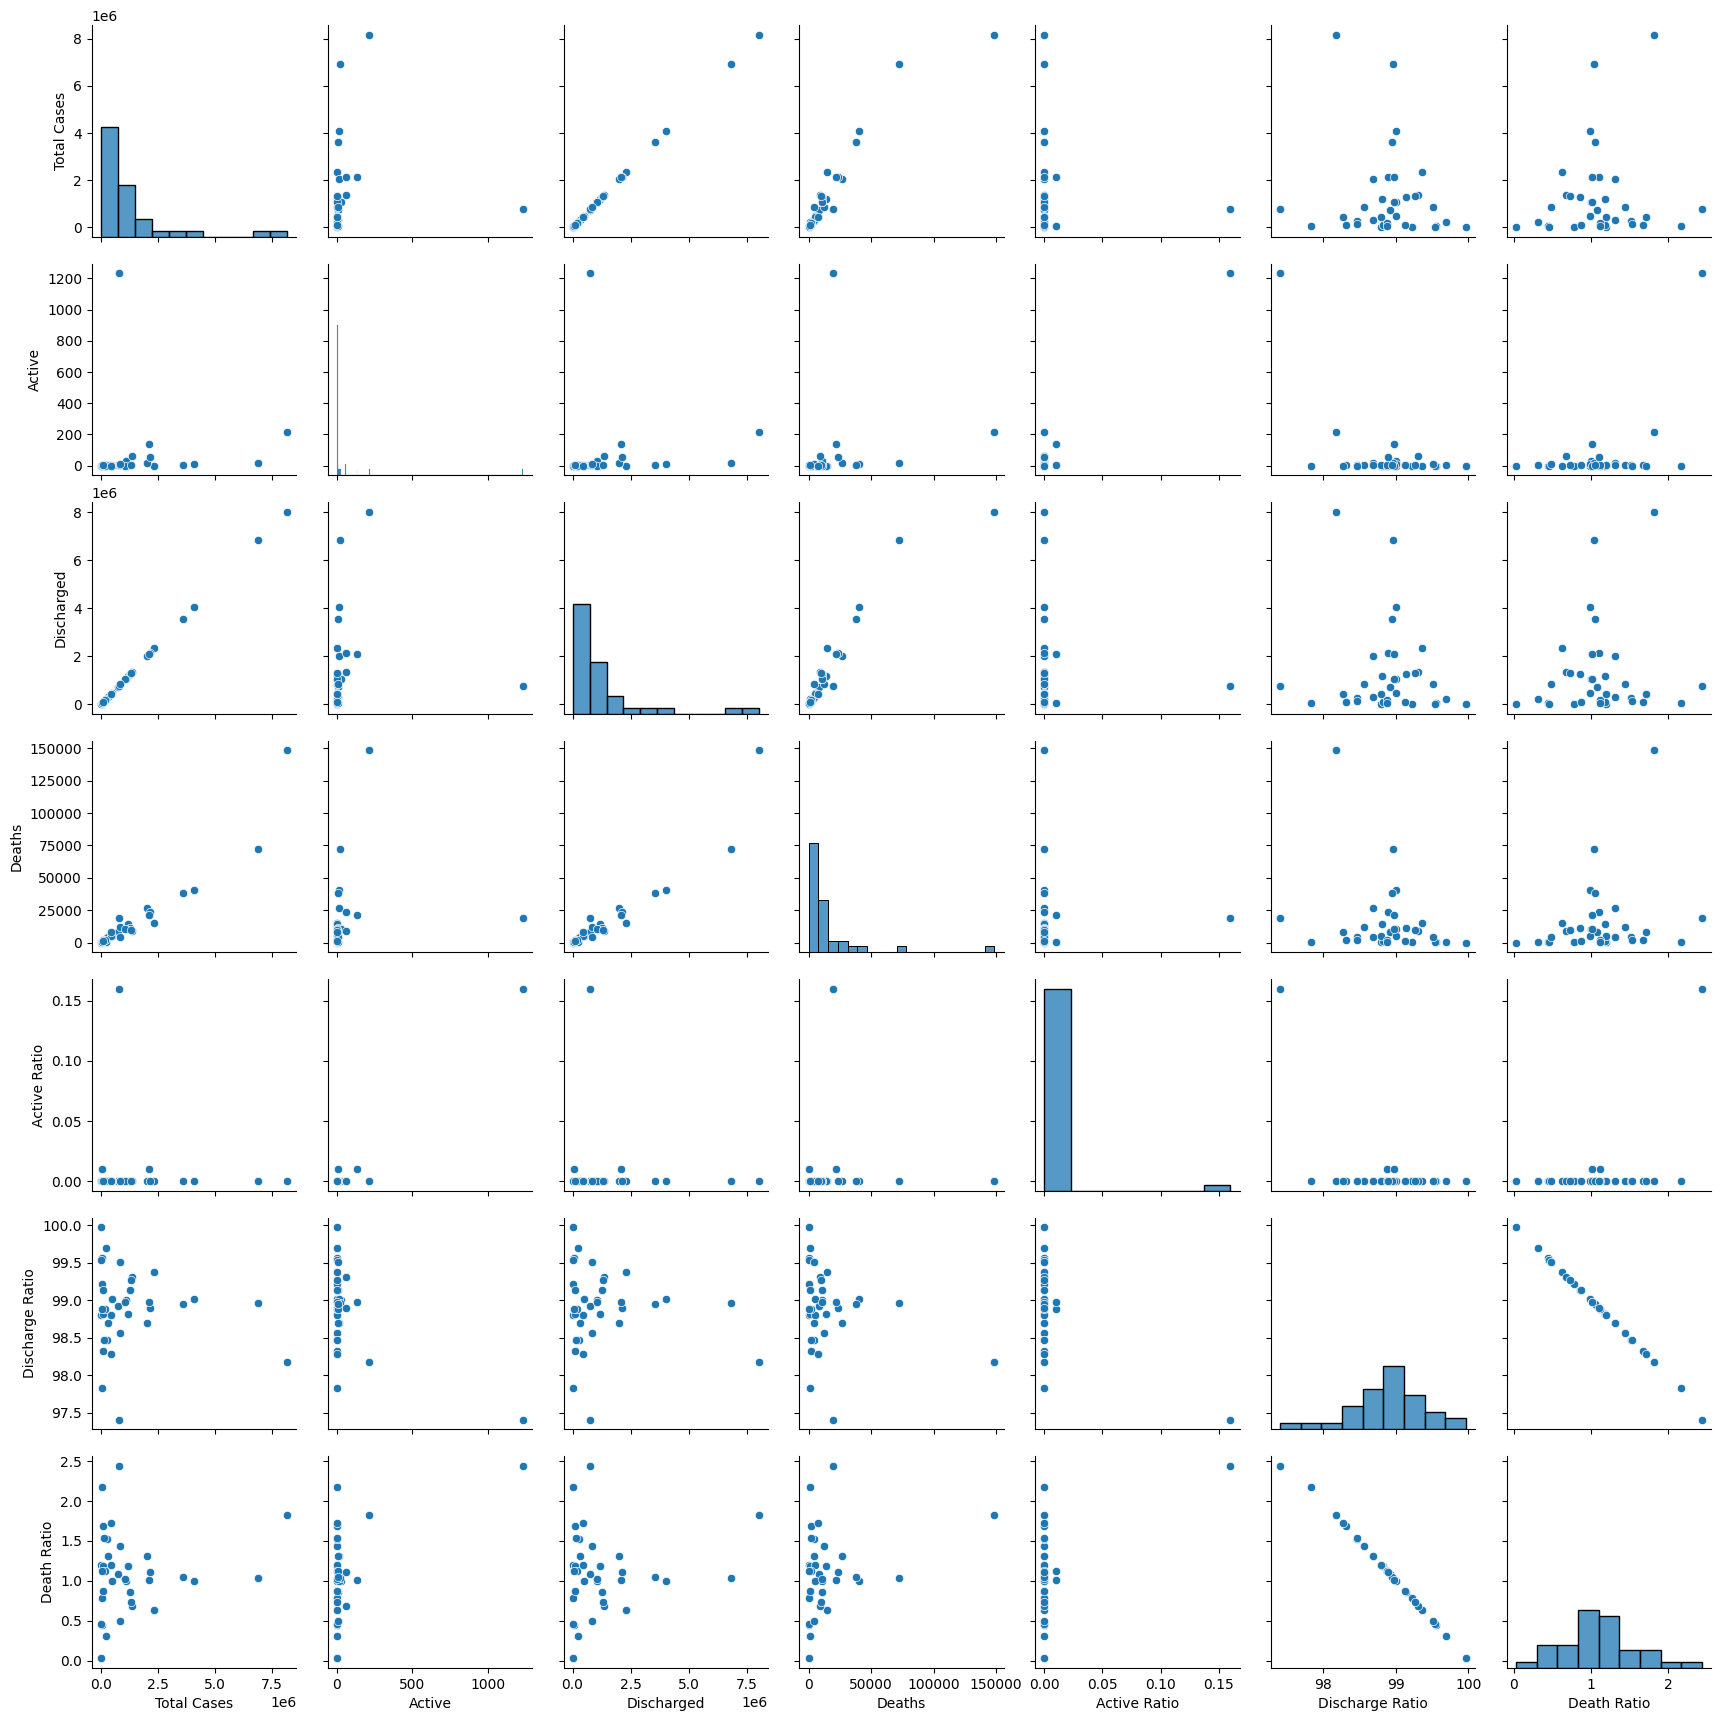

In [67]:
sns.pairplot(df)

The scatterplot matrix reveals interesting relationships between COVID-19 indicators. We see a strong positive correlation between Total Cases and both Active Cases and Discharged cases, suggesting that as the overall case count rises, so do the number of active infections and individuals who have recovered. Additionally, there is a positive correlation between Active Cases and Deaths, indicating that a higher number of active cases is associated with a greater number of fatalities. Interestingly, the Active Ratio (the proportion of active cases to total cases) shows a negative correlation with Discharged Ratio, suggesting that as the proportion of active cases increases, the proportion of discharged cases tends to decrease. This matrix provides valuable insights into the dynamics of COVID-19 spread and its impact on various health metrics

##  how does it visualize the relationship between total COVID-19 cases and discharged individuals across different states?

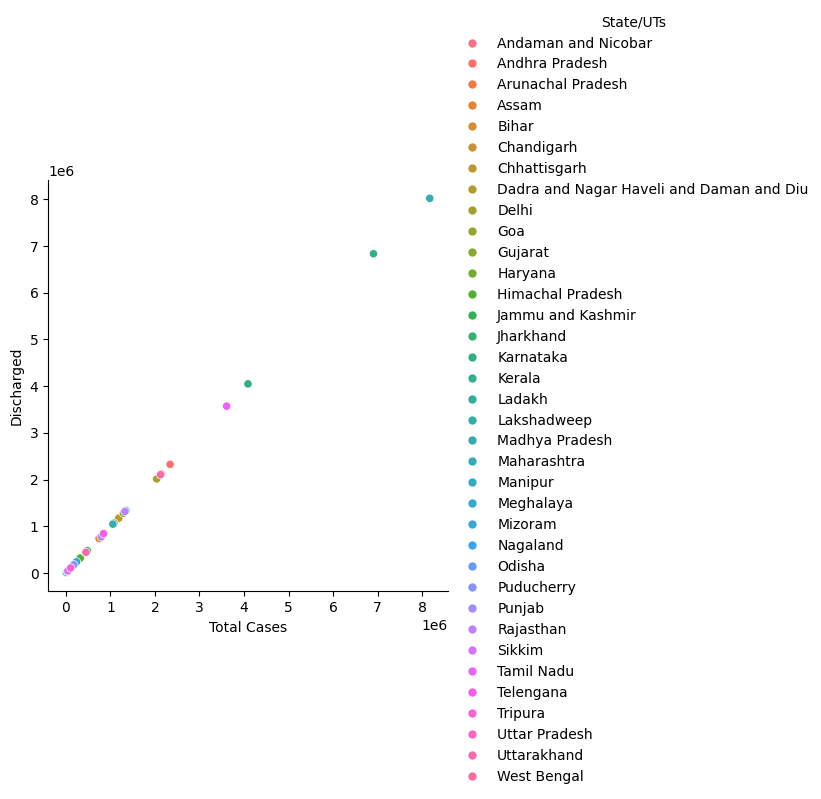

In [68]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

  the total number of COVID-19 cases and the number of discharges across different
states or union territories. By using the hue parameter to differentiate between regions,
the plot allows you to compare how states are managing the pandemic, highlighting trends
such as whether higher case numbers correspond to more discharges or if some states are struggling with recovery.
It helps identify outliers, trends, and variations in performance across regions,
indicating where healthcare systems may be under stress or where recovery is progressing more efficiently.
The distribution of points also shows whether most states follow similar trends or exhibit significant differences.


### What does the following code generate, and how does it visualize the proportion of total COVID-19 cases in the top 5 states?


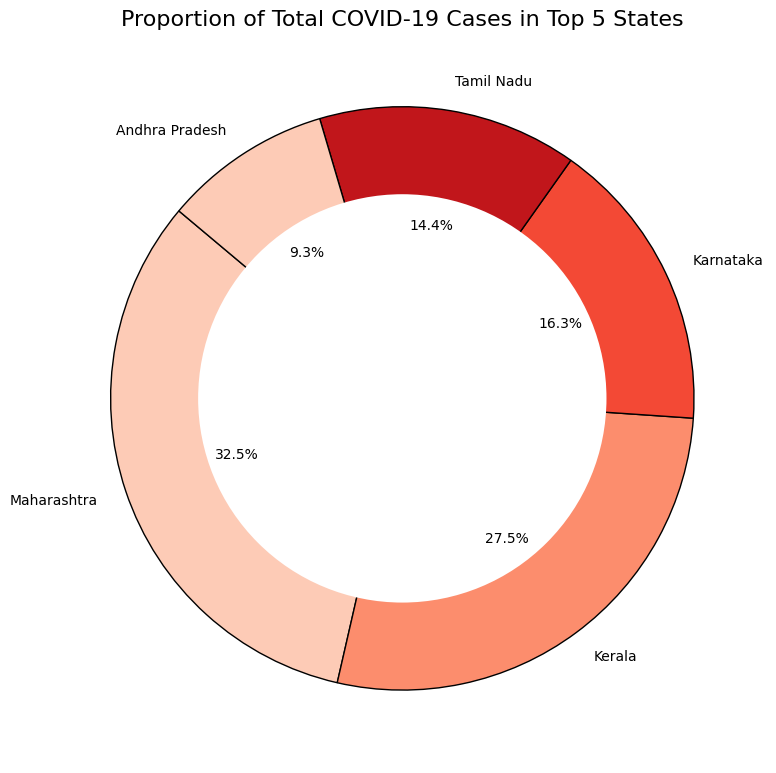

In [144]:
##  Proportion of Total COVID-19 Cases in Top 5 States
top_5_states = df.nlargest(5, 'Total Cases')

# Create the donut chart  
plt.figure(figsize=(8, 8))
colors = plt.cm.Reds(range(50, 250, 50))  # Generate shades of red
# Plot pie chart
plt.pie(
    top_5_states['Total Cases'], 
    labels=top_5_states['State/UTs'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)

# Add a white circle in the middle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Add a title
plt.title("Proportion of Total COVID-19 Cases in Top 5 States", fontsize=16)
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
The code generates a donut chart that visualizes the proportion of total COVID-19 
cases in the top 5 states with the highest number of cases. By displaying the percentage contribution of each state, 
it provides a clear view of how much each state contributes to the overall total.
The donut chart format emphasizes these proportions, making it easy to identify which states have the highest burden of COVID-19 cases. 
This visualization helps to quickly grasp the distribution of cases across the top states.

  ## What does the following code generate, and how does it visualize the relationship between active COVID-19 cases and deaths?


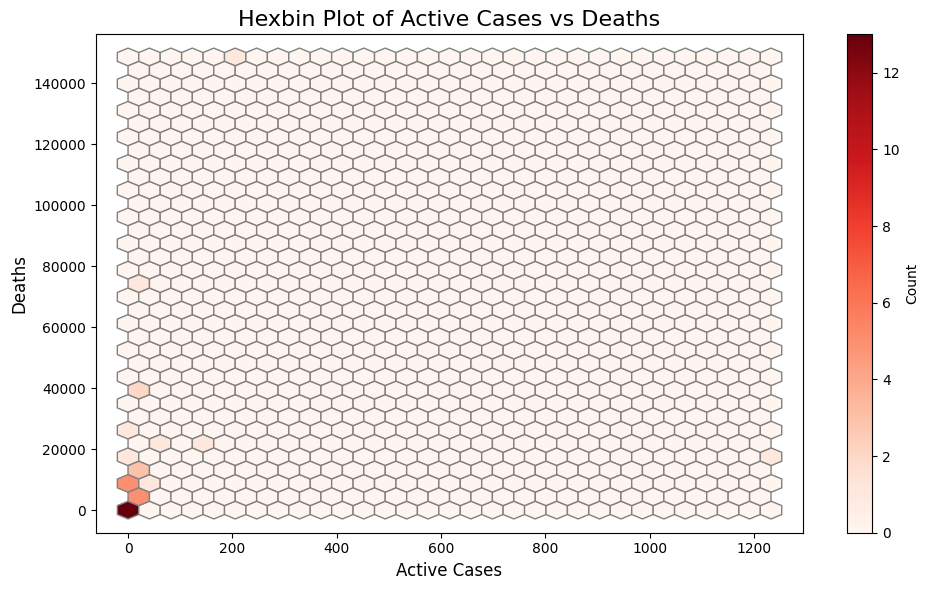

In [192]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(
    x=df['Active'], 
    y=df['Deaths'], 
    gridsize=30,  
    cmap='Reds', 
    edgecolors='grey'
)
cb = plt.colorbar(hb)
cb.set_label('Count')
plt.title('Hexbin Plot of Active Cases vs Deaths', fontsize=16)
plt.xlabel('Active Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
The hexbin plot visualizes the relationship between active COVID-19 cases and deaths, 
using hexagonal bins to represent the density of data points. 
Each hexagon's color intensity, based on the 'Reds' color scheme, 
indicates the count of data points within that bin, with darker colors representing higher densities. 
The plot helps to identify patterns, such as whether higher numbers of active cases correlate with an increase in deaths.
The addition of a color bar provides a clear reference for the count,
making it easier to interpret the distribution and concentration of active cases and deaths.

### What does the following code generate, and how does it visualize the COVID-19 data for the top 5 states?

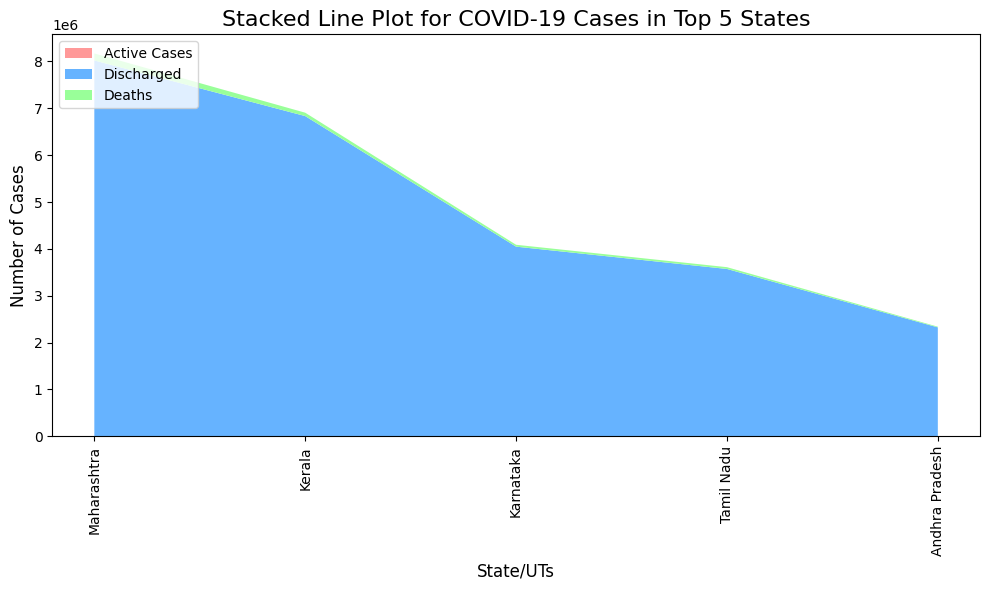

In [148]:
top_states = df.nlargest(5, 'Total Cases')
plt.figure(figsize=(10, 6))
plt.stackplot(
    top_states['State/UTs'], 
    top_states['Active'], 
    top_states['Discharged'], 
    top_states['Deaths'], 
    labels=['Active Cases', 'Discharged', 'Deaths'], 
    colors=['#ff9999', '#66b3ff', '#99ff99'] 
)
plt.xlabel('State/UTs', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title('Stacked Line Plot for COVID-19 Cases in Top 5 States', fontsize=16)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
The code generates a stacked line plot that visualizes the distribution of COVID-19 cases in the top 5 states.
It shows the number of active cases, discharged individuals, and deaths for each state, with different colors representing each category. 
This visualization allows for an easy comparison of the proportions of these three metrics across the top states, 
    highlighting trends and helping to understand how the COVID-19 situation varies in terms of recovery, active cases, and fatalities

### What does the following code generate, and how does it visualize the data for the top states across different metrics?

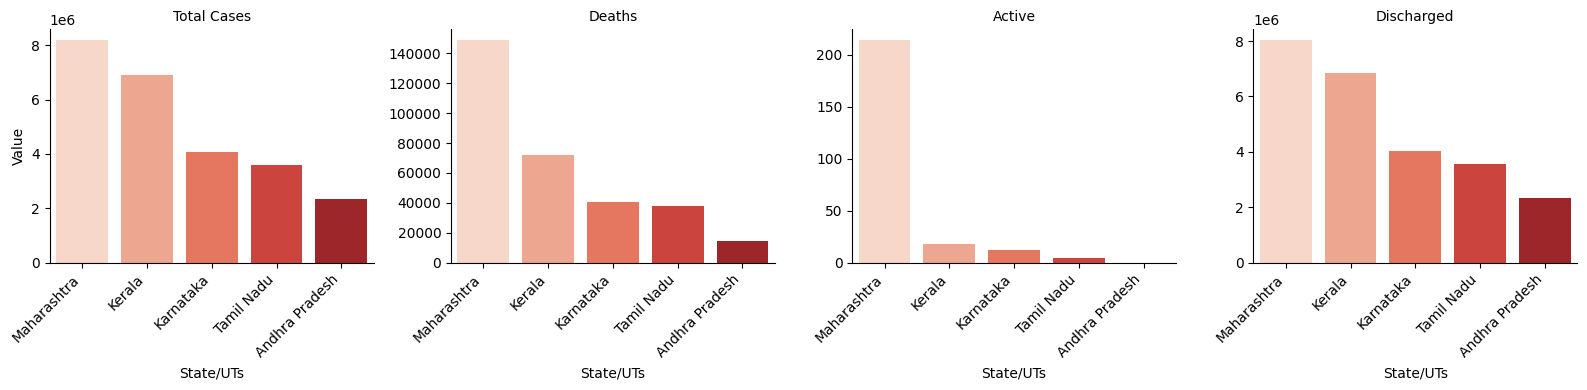

In [178]:
melted_data = top_states.melt(id_vars="State/UTs", 
                              value_vars=["Total Cases", "Deaths", "Active", "Discharged"],
                              var_name="Metric", value_name="Value")
g = sns.FacetGrid(melted_data, col="Metric", col_wrap=5, height=4, sharex=False, sharey=False)
g.map(sns.barplot, "State/UTs", "Value", palette="Reds", order=top_states["State/UTs"])
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("State/UTs", "Value")
plt.tight_layout()
plt.show()

The FacetGrid map highlights key COVID-19 metrics across the top 10 states with the highest cases. Maharashtra stands out with the highest total cases and deaths, reflecting its significant impact during the pandemic. Kerala and Karnataka follow closely in terms of total cases, with Kerala showing a strong recovery rate as indicated by its high discharge numbers. Active cases across all states appear relatively low, suggesting successful resolution of most cases through recovery or other outcomes. The visualization underscores the regional disparity in COVID-19's impact, with states like Maharashtra and Kerala serving as critical points for healthcare focus and resource allocation. Overall, the graph provides a multidimensional view of the pandemic's progression and outcomes in these states.


  # Conclusion

In [1]:
The analysis of COVID-19 data has provided crucial insights into the pandemic's impact across 
states and union territories in India. By leveraging data visualization techniques such as bar plots, pie charts, heatmaps, and geospatial maps,     
we were able to uncover key trends, patterns, and outliers in the dataset.


SyntaxError: unterminated string literal (detected at line 1) (2727198109.py, line 1)